# Capstone Project Análisis de Datos
## Grupo IV
Tema: Incidencia de las condiciones climáticas en el arrendamiento de bicicletas

## Librerías

In [1]:
import pandas as pd
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")

## Importación de datos

In [4]:
df=pd.read_csv('/content/SeoulBikeData.csv',sep=';', encoding= 'unicode_escape',parse_dates=[0])
df.head()

,Date,Rented Bike Count,Hour,Temperature(?C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(?C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


A continuación podemos ver que:
* Una columna está en el tipo Fecha.
* Cuatro columnas están en tipos de datos enteros.
* Seis columnas están en tipos de datos flotantes.
* Tres columnas están en tipos de datos de objetos.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(?C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(?C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [8]:
#Renombrmos las columnas para que sean más fáciles de trabajar
df=df.rename(columns={'Temperature(?C)':'Temperature',
                      'Humidity(%)':'Humidity',
                      'Rainfall(mm)':'Rainfall',
                      'Snowfall (cm)':'Snowfall',
                      'Wind speed (m/s)':'Wind speed',
                      'Visibility (10m)':'Visibility',
                      'Solar Radiation (MJ/m2)':'Radiation',
                      'Dew point temperature(?C)':'Dew point temperature'})
print(df.columns)


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity',
       'Wind speed', 'Visibility', 'Dew point temperature', 'Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning Day'],
      dtype='object')


## Análisis Descriptivo

### Describe

In [9]:
df.describe().style.background_gradient()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Comprobación de valores únicos en todos los atributos

In [10]:
#Diferentes números de valores distintos en cada atributo.
df.nunique().sort_values(ascending=True)

Holiday                     2
Functioning Day             2
Seasons                     4
Hour                       24
Snowfall                   51
Rainfall                   61
Wind speed                 65
Humidity                   90
Radiation                 345
Date                      365
Temperature               546
Dew point temperature     556
Visibility               1789
Rented Bike Count        2166
dtype: int64

### Porcentaje de valores faltantes en cada columna

In [11]:
pd.options.display.float_format = '{:,.2f} %'.format
print((df.isnull().sum()/len(df))*100)
pd.options.display.float_format = '{:,.2f}'.format

Date                    0.00 %
Rented Bike Count       0.00 %
Hour                    0.00 %
Temperature             0.00 %
Humidity                0.00 %
Wind speed              0.00 %
Visibility              0.00 %
Dew point temperature   0.00 %
Radiation               0.00 %
Rainfall                0.00 %
Snowfall                0.00 %
Seasons                 0.00 %
Holiday                 0.00 %
Functioning Day         0.00 %
dtype: float64


## Data Visualization

### Missing Value Plot 

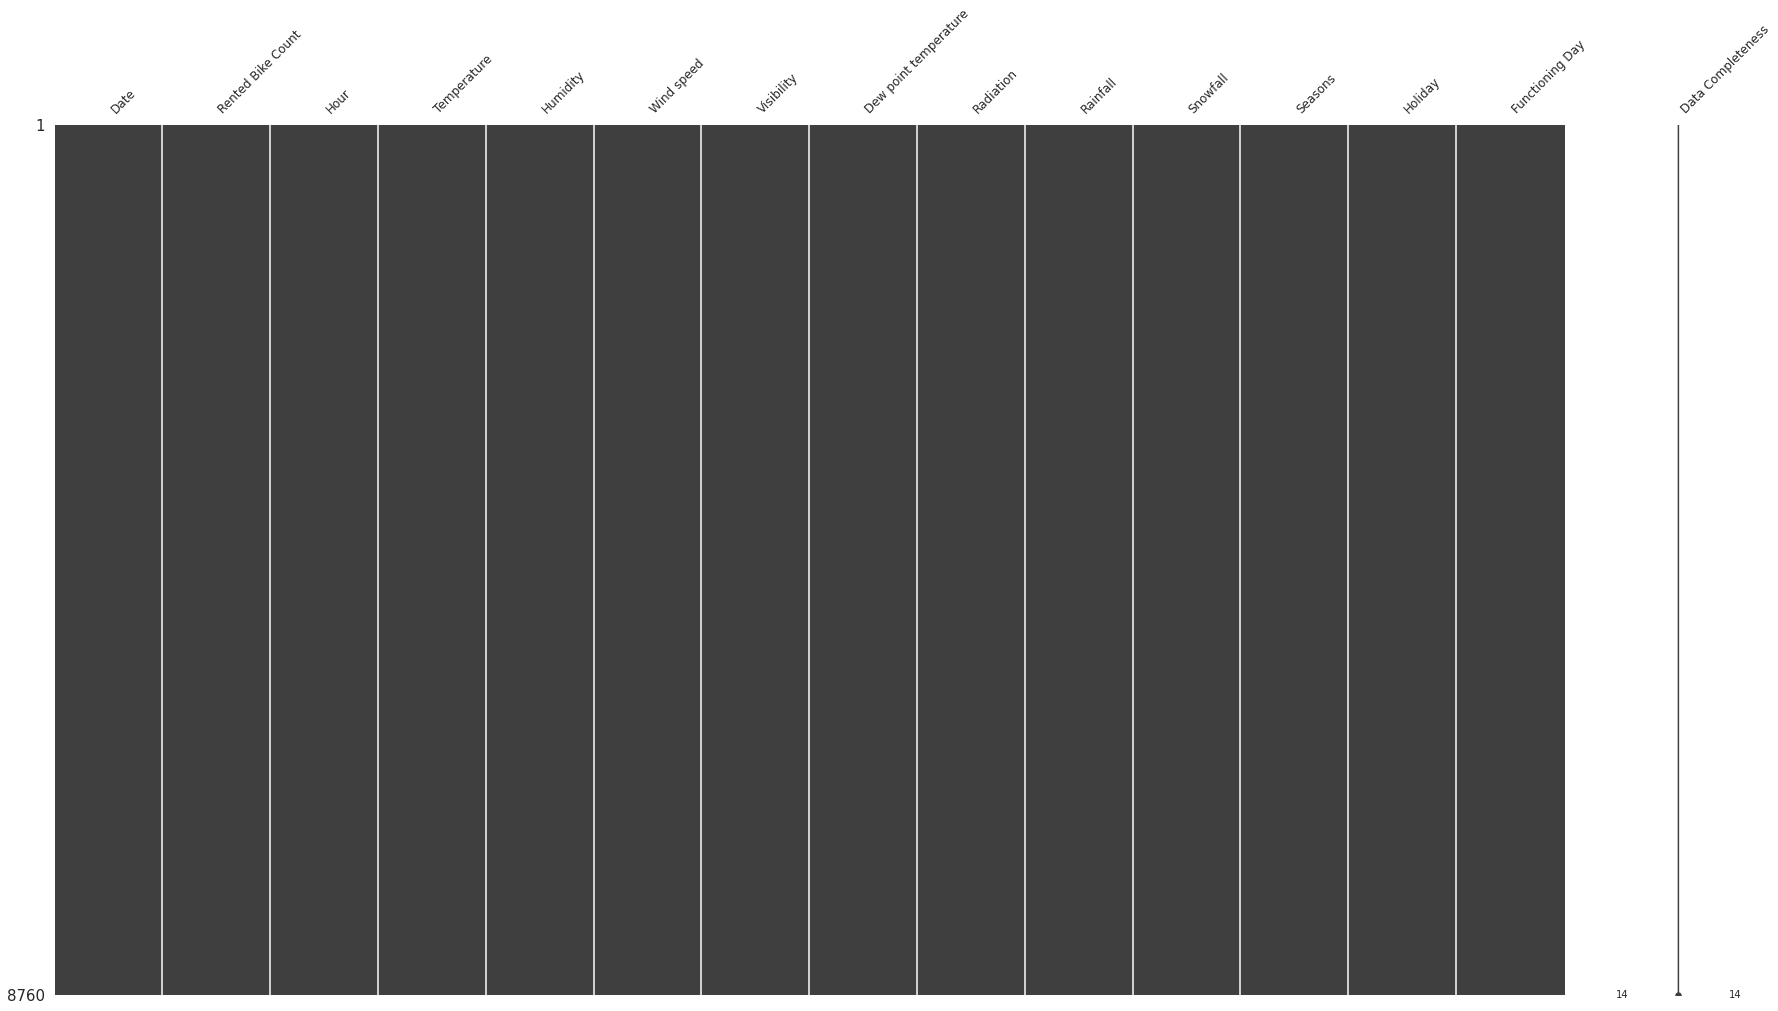

In [12]:
import missingno as msno
msno.matrix(df,labels=[df.columns],figsize=(30,16),fontsize=12)

### Bar Plot

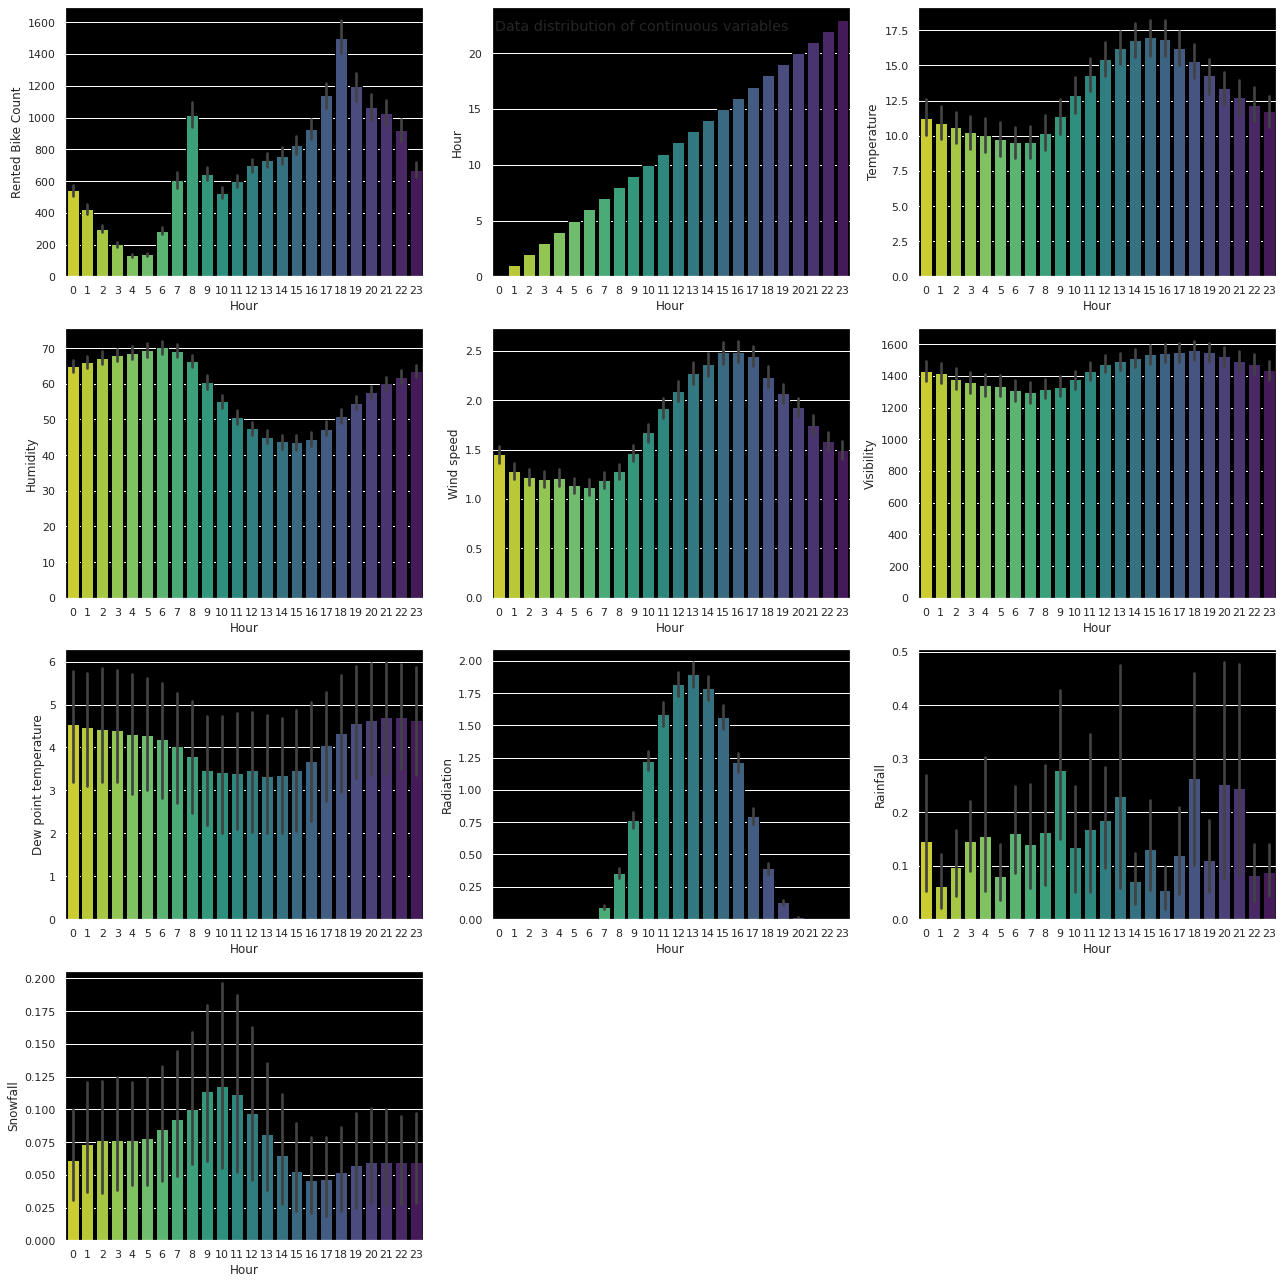

In [13]:
#Podemos ver cada gráfico y ver la distribución de datos por horas.
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64','int']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(4,3, i+1)
    sns.barplot(data=df,x='Hour', y=col, ax=ax,edgecolor="black",palette='viridis_r')
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

### Comprobación de la distribución de datos de cada variable continua

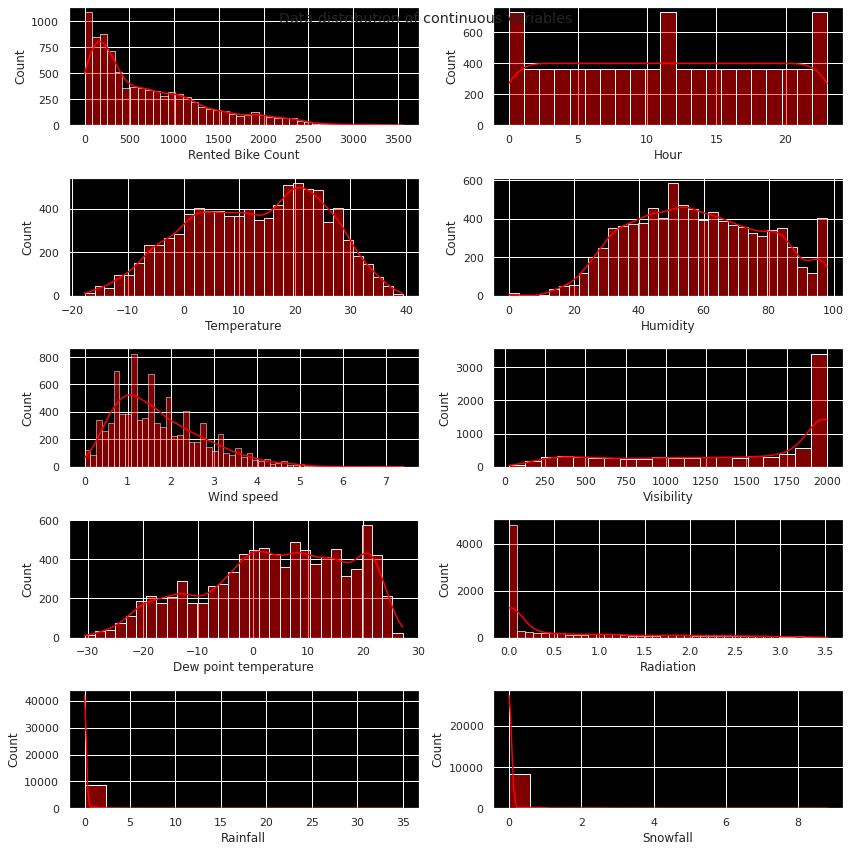

In [14]:
plt.figure(figsize=(12, 12))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,2, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

¿Qué es la distribución sesgada?
> Si una cola es más larga que otra, la distribución está sesgada. Estas distribuciones a veces se denominan distribuciones asimétricas o asimétricas, ya que no muestran ningún tipo de simetría. 
> La simetría significa que la mitad de la distribución es una imagen especular de la otra mitad. Por ejemplo, la distribución normal es una distribución simétrica sin sesgo. Las colas son exactamente iguales.
> Sesgo a la izquierda o sesgo negativo: una distribución sesgada a la izquierda tiene una cola larga a la izquierda. Las distribuciones asimétricas a la izquierda también se denominan distribuciones asimétricas negativas. (Media<Mediana<Moda)
> Sesgo a la derecha o sesgo positivo: una distribución sesgada a la derecha tiene una cola larga a la derecha.
> Las distribuciones asimétricas a la derecha también se denominan distribuciones asimétricas positivas. (Media>Mediana>Moda)
> Distribución simétrica: una distribución simétrica es un tipo de distribución en la que el lado izquierdo de la distribución refleja el lado derecho (media = mediana = moda). Distribución ex-normal

OBSERVACIONES:
> En el gráfico anterior podemos ver que hay muchos atributos que se distribuyen positiva o negativamente.

### Box Plot

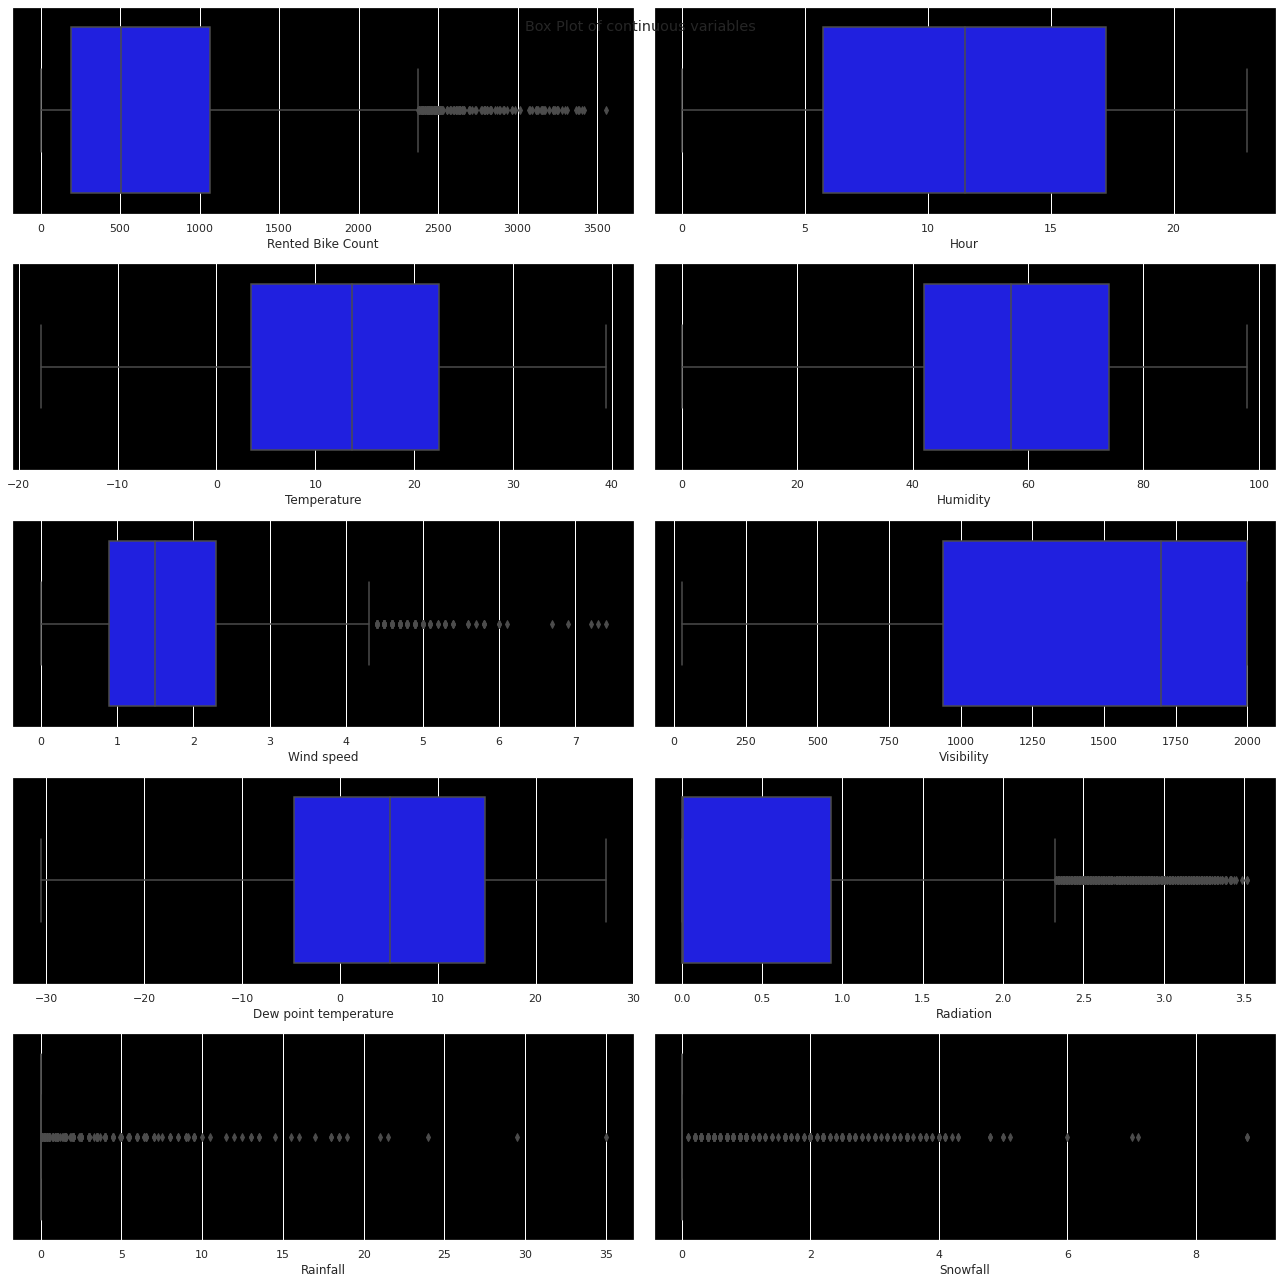

In [15]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,2, i+1)
    sns.boxplot(data=df, x=col, ax=ax,color='blue')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

In [20]:
#selecting variables that have data types float and int.
var=list(df.select_dtypes(include=['float64','int64']).columns)

In [21]:
from sklearn.preprocessing import PowerTransformer
sc_X=PowerTransformer(method = 'yeo-johnson')
df[var]=sc_X.fit_transform(df[var])

### Distribución de datos después de aplicar Power Transformer



Ahora las parcelas de distribución se ven más simétricas después de aplicar Power Transformer

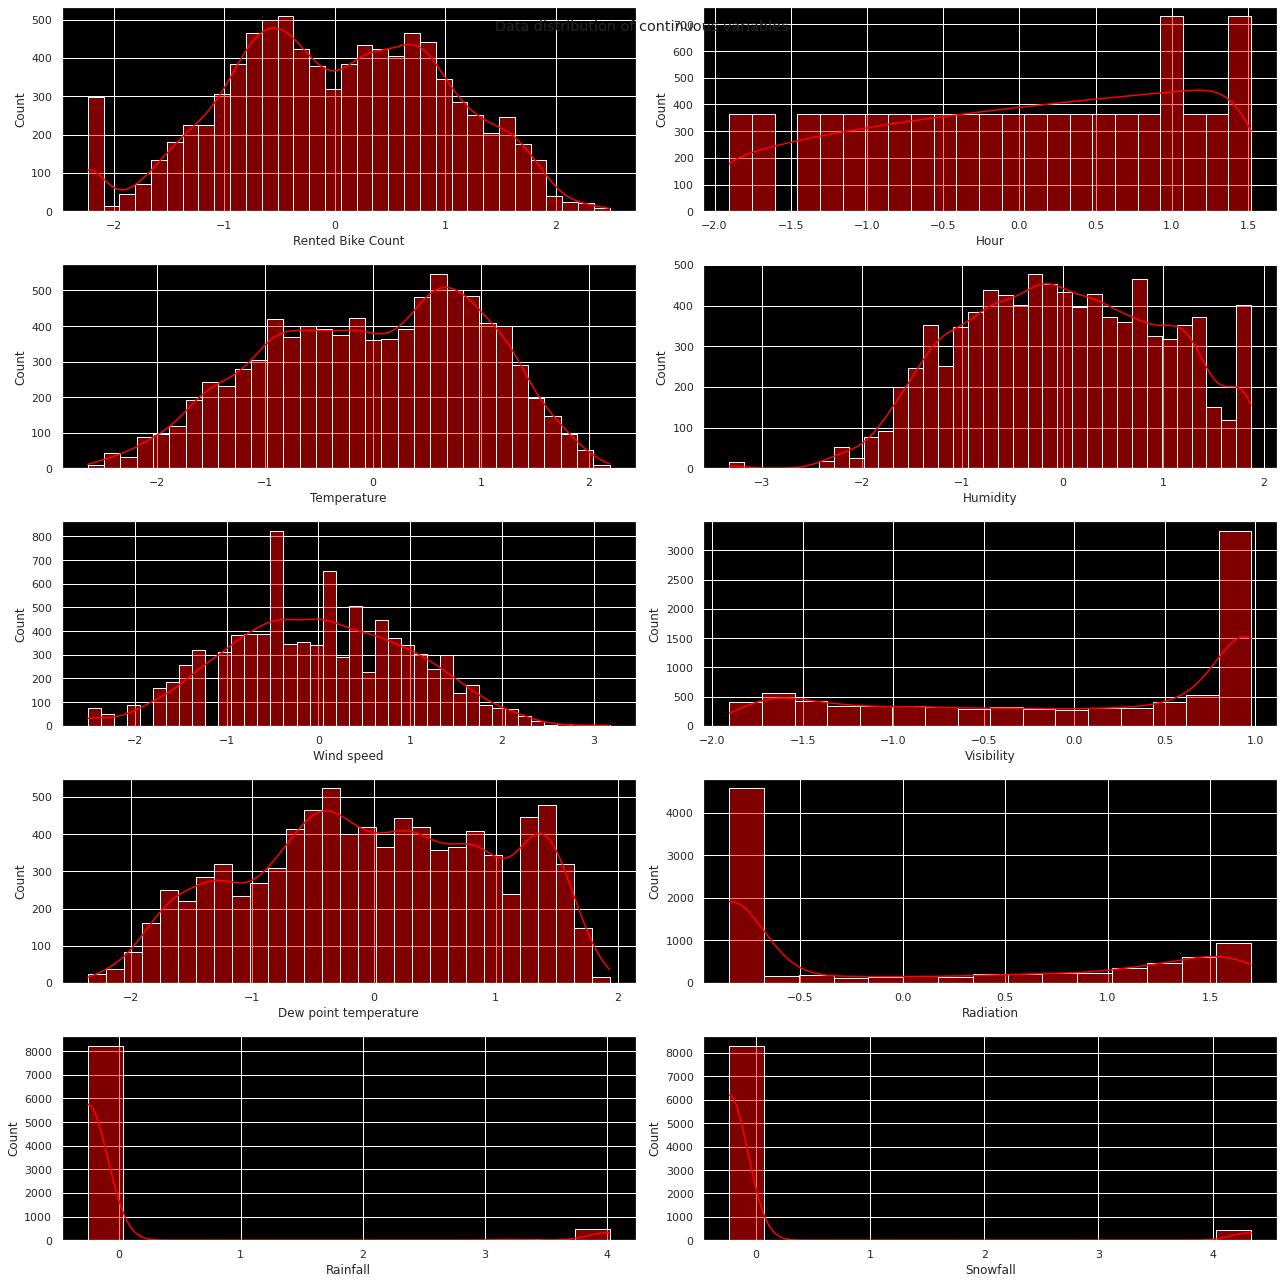

In [22]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,2, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()


### Diagrama de caja después de aplicar el transformador de potencia

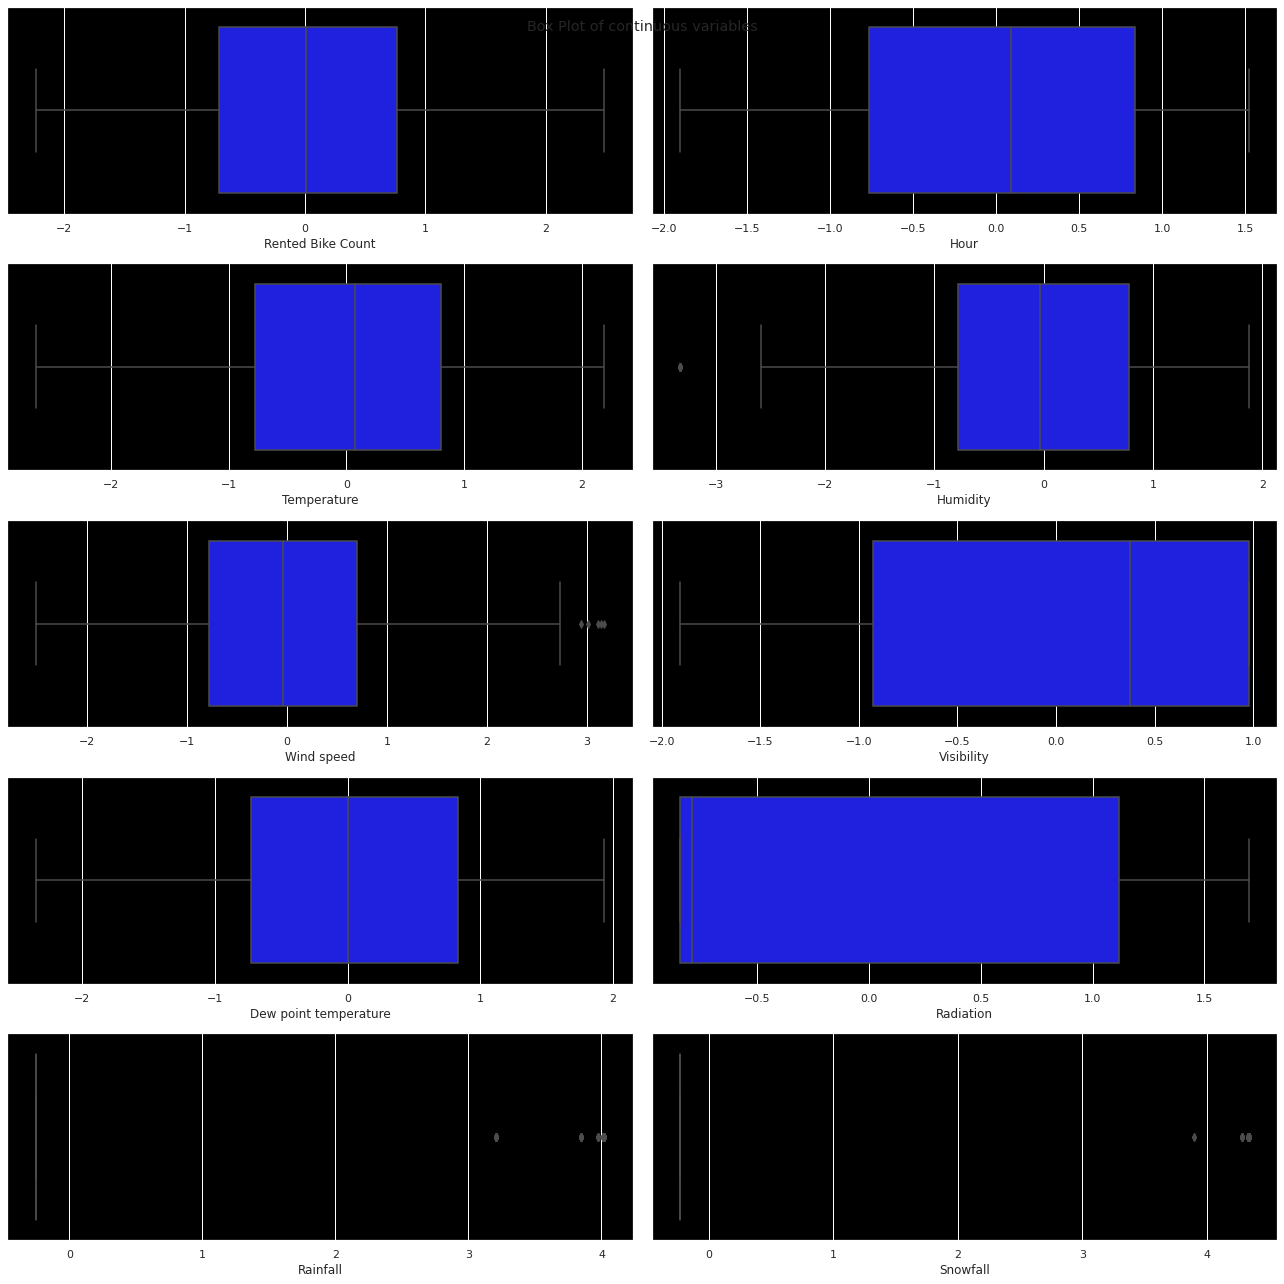

In [23]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,2, i+1)
    sns.boxplot(data=df, x=col, ax=ax,color='blue')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

### HeatMap

Con el diagrama de mapa de calor anterior, podemos interpretar qué variable está correlacionada con otra variable.

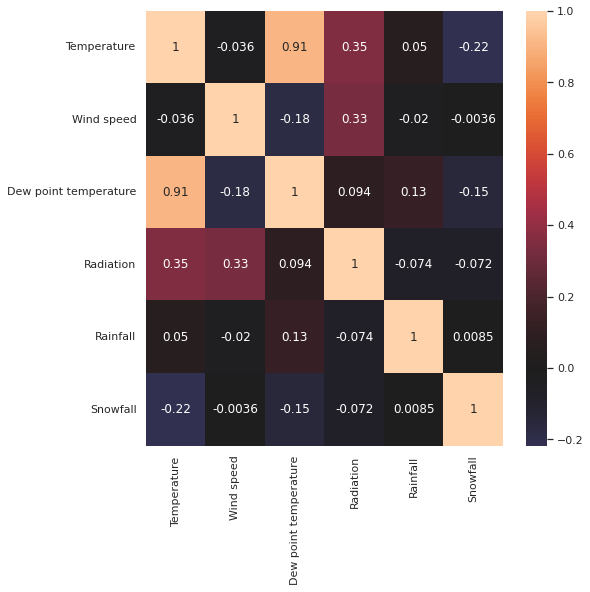

In [16]:
plt.figure(figsize=(8,8))
sns.heatmap(df.select_dtypes(include=['float']).corr(),annot=True,center = 0)
plt.show()

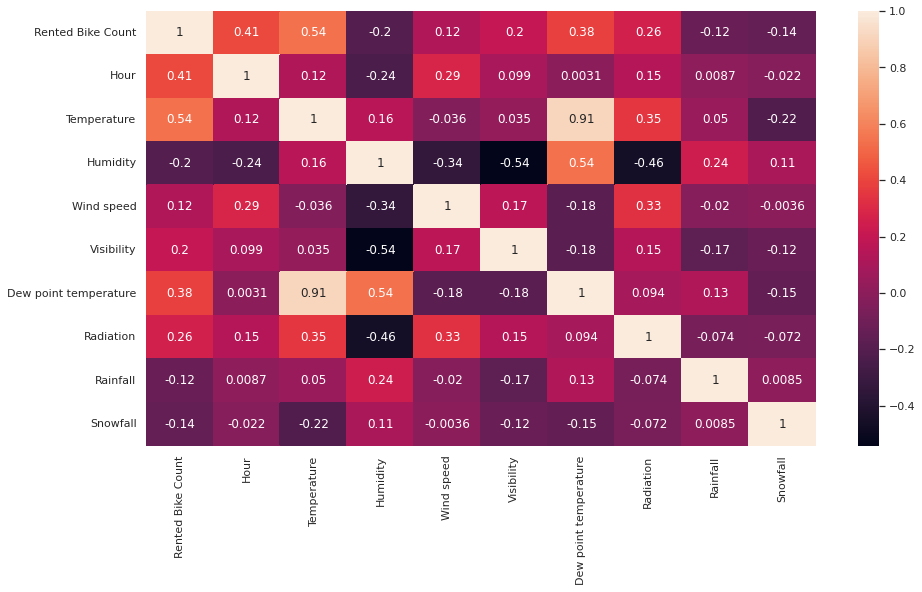

In [17]:
corr = df.corr()
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.heatmap(corr, annot=True)


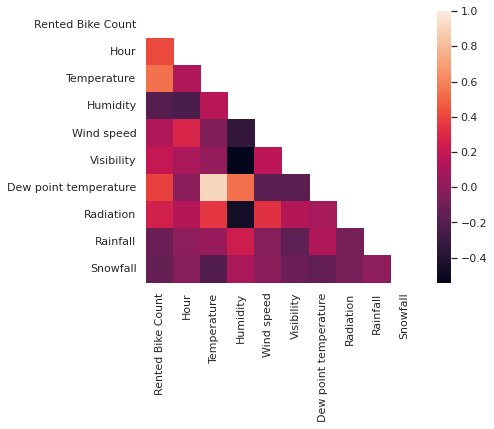

In [18]:
import matplotlib.pyplot as plt
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)

### Pie Chart: Análisis de variable categórica

> En el siguiente gráfico, está claro que se trata de datos totalmente balanceados.

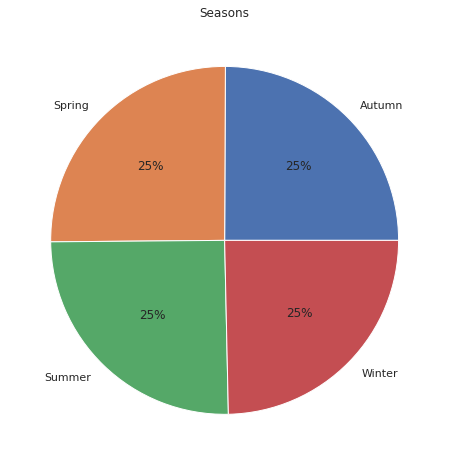

In [24]:
season_var=pd.crosstab(index=df['Seasons'],columns='% observations')
plt.pie(season_var['% observations'],labels=season_var['% observations'].index,autopct='%.0f%%')
plt.title('Seasons')
plt.show()

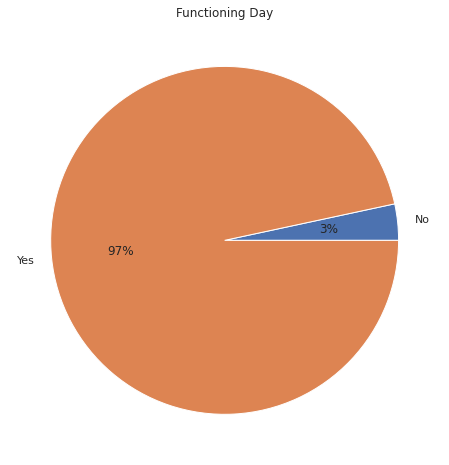

In [25]:
Functioning_Day_var=pd.crosstab(index=df['Functioning Day'],columns='% observations')
plt.pie(Functioning_Day_var['% observations'],labels=Functioning_Day_var['% observations'].index,autopct='%.0f%%')
plt.title('Functioning Day')
plt.show()

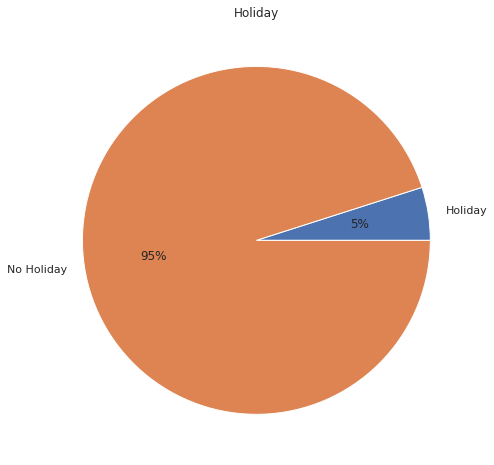

In [26]:
holiday_var=pd.crosstab(index=df['Holiday'],columns='% observations')
plt.pie(holiday_var['% observations'],labels=holiday_var['% observations'].index,autopct='%.0f%%')
plt.title('Holiday')
plt.show()

> El gráfico de recuento muestra que la variable Estaciones está equilibrada

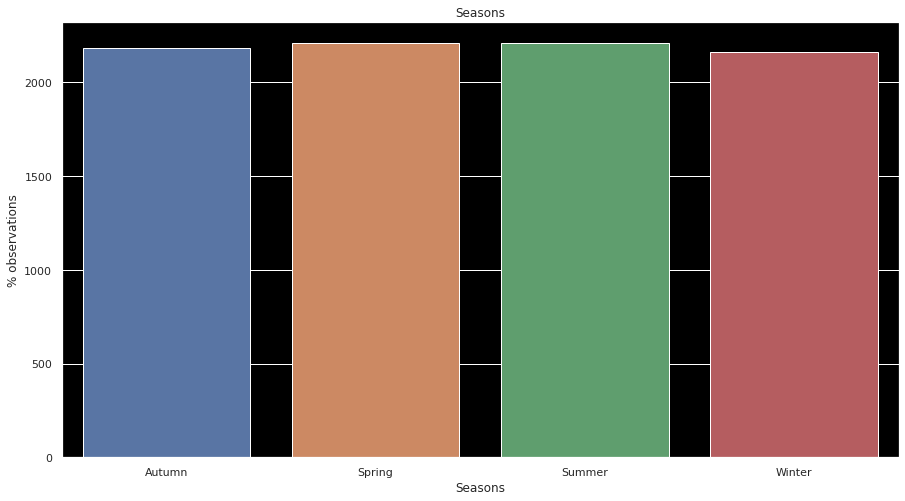

In [27]:
sns.barplot(x=season_var.index,y=season_var['% observations'])
plt.title('Seasons')
plt.show()

### VIF

¿Qué es VIF?
> Un factor de inflación de varianza (VIF) detecta la multicolinealidad en el análisis de regresión. La multicolinealidad es cuando hay correlación entre predictores (es decir, variables independientes) en un modelo; su presencia puede afectar negativamente los resultados de su regresión. El VIF estima cuánto se infla la varianza de un coeficiente de regresión debido a la multicolinealidad en el modelo.

In [29]:
df=pd.get_dummies(df,columns=['Holiday','Seasons','Functioning Day','Hour'],drop_first=True)
X=df.iloc[:,2:]
y=df.iloc[:,1]

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [31]:
calc_vif(X.select_dtypes(include=['float','int']))

,variables,VIF
0,Temperature,45.79
1,Humidity,12.01
2,Wind speed,1.23
3,Visibility,1.56
4,Dew point temperature,60.27
5,Radiation,1.86
6,Rainfall,1.20
7,Snowfall,1.17


OBSERVACION: La temperatura del punto de rocío está altamente correlacionada. Eliminemos esta variable y verifiquemos el puntaje VIF nuevamente.

In [32]:
del X['Dew point temperature']
calc_vif(X.select_dtypes(include=['float','int']))

,variables,VIF
0,Temperature,1.56
1,Humidity,2.44
2,Wind speed,1.23
3,Visibility,1.50
4,Radiation,1.83
5,Rainfall,1.19
6,Snowfall,1.16


Cada variable está dentro del rango entre 1 y 5.

## Feature Selection

> Los métodos de selección de características están destinados a reducir el número de variables de entrada a aquellas que se consideran más útiles para un modelo a fin de predecir la variable objetivo.

> En nuestro conjunto de datos tenemos una variable de entrada numérica y una variable de salida numérica, por lo que usaremos la de Pearson para la selección de funciones.

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X, y)
feature_contribution=(fs.scores_/sum(fs.scores_))*100

Temperature : 24.19%
Humidity : 3.52%
Wind speed : 1.16%
Visibility : 2.43%
Radiation : 8.55%
Rainfall : 5.65%
Snowfall : 2.65%
Holiday_No Holiday : 0.53%
Seasons_Spring : 0.07%
Seasons_Summer : 6.95%
Seasons_Winter : 13.04%
Functioning Day_Yes : 13.83%
Hour_-1.6548714129993143 : 0.27%
Hour_-1.4402626210764762 : 0.91%
Hour_-1.2448659139264244 : 1.95%
Hour_-1.062615753178147 : 3.25%
Hour_-0.8902006518776767 : 3.11%
Hour_-0.725556724703515 : 1.15%
Hour_-0.5672855293241121 : 0.02%
Hour_-0.41438295457830404 : 0.47%
Hour_-0.2660965591935002 : 0.00%
Hour_-0.12184366457225562 : 0.05%
Hour_0.01883886463516997 : 0.00%
Hour_0.15632703712075513 : 0.04%
Hour_0.29093154570740787 : 0.08%
Hour_0.42291295238673404 : 0.11%
Hour_0.5524925678867186 : 0.21%
Hour_0.6798604391497868 : 0.39%
Hour_0.8051813382500899 : 0.93%
Hour_0.9285993359197644 : 2.18%
Hour_1.0502413509653417 : 0.97%
Hour_1.1702199445458765 : 0.56%
Hour_1.2886355482102019 : 0.49%
Hour_1.4055782609097562 : 0.28%
Hour_1.5211293134468649 : 0.

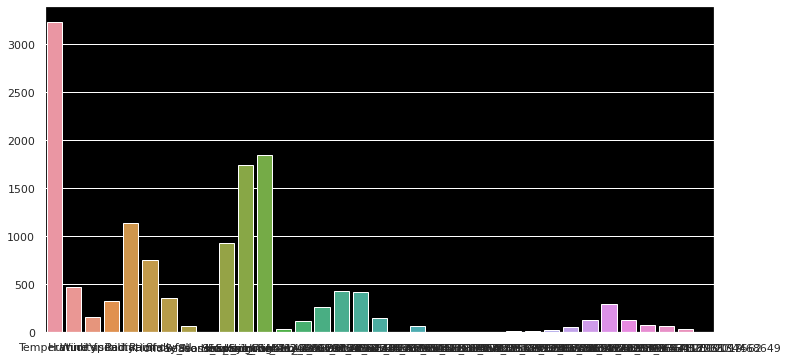

In [35]:
for i,j in enumerate(X.columns):
    print(f'{j} : {feature_contribution[i]:.2f}%')
plt.figure(figsize=(12,6))
sns.barplot(x=X.columns,y=fs.scores_)
plt.show()

OBSERVACION: 
> En el gráfico de barras anterior podemos ver la importancia de las características e incluiremos solo aquellas características que son más importantes para nuestro modelo.

## Splitting our dataset into train and test set

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

### Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Modelamiento

In [38]:
#importing different Regression models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score

### Medidas de desempeño para la regresión

### K-fold Cross Validation

In [40]:
#Creación de diccionario para almacenar la precisión de diferentes modelos
model_comparison={}

## Linear Regression

In [41]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Linear Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 80.76%
Model MSE : 19.16%
Cross Val Accuracy: 80.35 %
Cross Val Standard Deviation: 0.59 %


### Resumen de regresión lineal

In [42]:
import statsmodels.api as sm
lin_reg=sm.OLS(y_train,X_train).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.807
Model:                            OLS   Adj. R-squared (uncentered):              0.805
Method:                 Least Squares   F-statistic:                              726.5
Date:                Sat, 15 Oct 2022   Prob (F-statistic):                        0.00
Time:                        02:40:30   Log-Likelihood:                         -3668.0
No. Observations:                6132   AIC:                                      7406.
Df Residuals:                    6097   BIC:                                      7641.
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3607      0.013     27.283      0.000       0.335       0.387
x2            -0.1188      0.010    -12.492      0.000      -0.137      -0.100
x3            -0.0206      0.007     -3.046      0.002      -0.034      -0.007
x4             0.0084      0.007      1.157      0.247      -0.006       0.023
x5             0.2291      0.017     13.603      0.000       0.196       0.262
x6            -0.2603      0.006    -40.988      0.000      -0.273      -0.248
x7            -0.0006      0.006     -0.102      0.919      -0.013       0.012
x8             0.0513      0.006      8.986      0.000       0.040       0.063
x9            -0.1030      0.007    -13.836      0.000      -0.118      -0.088
x10           -0.0957      0.009    -10.381      0.000      -0.114      -0.078
x11           -0.2716      0.010    -25.983      0.000      -0.292      -0.251
x12            0.4646      0.006     79.193      0.000       0.453       0.476
x13           -0.0427      0.008     -5.447      0.000      -0.058      -0.027
x14           -0.0908      0.008    -11.508      0.000      -0.106      -0.075
x15           -0.1212      0.008    -15.453      0.000      -0.137      -0.106
x16           -0.1727      0.008    -22.168      0.000      -0.188      -0.157
x17           -0.1624      0.008    -20.873      0.000      -0.178      -0.147
x18           -0.0758      0.008     -9.681      0.000      -0.091      -0.060
x19            0.0035      0.008      0.438      0.661      -0.012       0.019
x20            0.0594      0.008      7.047      0.000       0.043       0.076
x21           -0.0377      0.009     -4.072      0.000      -0.056      -0.020
x22           -0.1138      0.010    -11.567      0.000      -0.133      -0.095
x23           -0.1130      0.010    -11.231      0.000      -0.133      -0.093
x24           -0.0958      0.010     -9.428      0.000      -0.116      -0.076
x25           -0.1002      0.010     -9.764      0.000      -0.120      -0.080
x26           -0.0995      0.010     -9.707      0.000      -0.120      -0.079
x27           -0.0798      0.010     -7.930      0.000      -0.100      -0.060
x28           -0.0477      0.010     -4.886      0.000      -0.067      -0.029
x29            0.0128      0.009      1.391      0.164      -0.005       0.031
x30            0.1193      0.008     14.495      0.000       0.103       0.135
x31            0.0908      0.008     11.289      0.000       0.075       0.107
x32            0.0832      0.008     10.710      0.000       0.068       0.098
x33            0.0975      0.008     12.277      0.000       0.082       0.113
x34            0.0698      0.008      8.942      0.000       0.055       0.085
x35            0.0129      0.008      1.675      0.094      -

### Supuestos de regresión lineal

In [44]:
residuals = lin_reg.resid
fitted_value=lin_reg.fittedvalues
np.mean(residuals)

0.010699177021444194

#### Comprobación de la normalidad de los residuos.

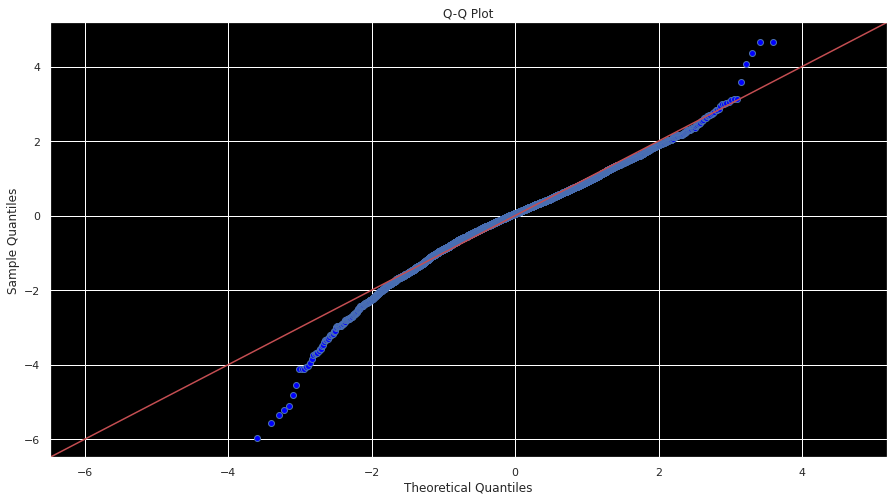

In [45]:
sm.qqplot(residuals,fit=True,line='45')
plt.title('Q-Q Plot')
plt.show()

#### Comprobación de la homocedasticidad

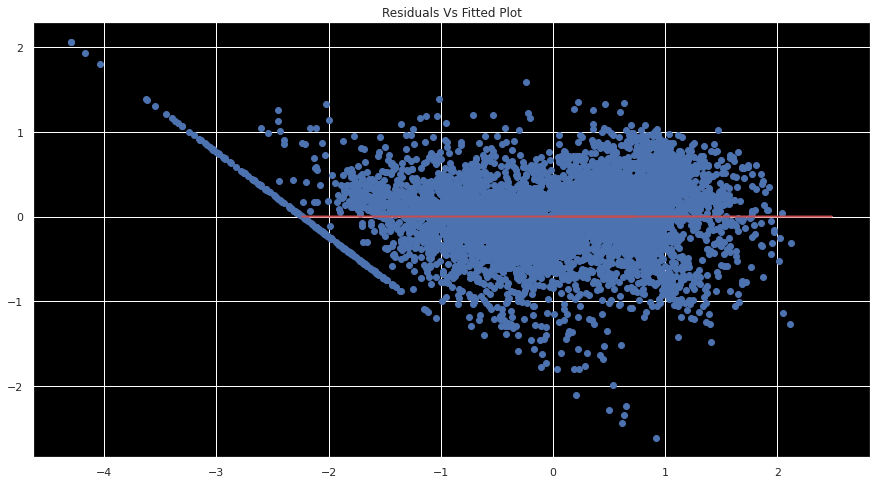

In [46]:
plt.scatter(fitted_value, residuals)
plt.plot(y_train, [0]*len(y_train),c='r')
plt.title('Residuals Vs Fitted Plot')
plt.show()